This notebook takes < ?mins to run top-to-bottom.

# This is a notebook for examining data after regridding is applied to imported data

## Description of imported data

See '/scripts/Examining Imported Data' to experiment with the initial imported data.

General Features:
- The time coordinate units are all the same, which is days since 1979-01-01.
- The files all come in batches of single years.
- All files have 2D real latitude and longitude auxilliary coordinates.
- The units for temperature are all the same (monthly mean values of degrees Kelvin) and for snowfall and melt the units are all the total monthly accumulation. 

## Description of regridding process

See '/scripts/regridding_imported_data.py' for the code used to regrid the imported data.

General Process:
- A list containing all the filenames imported (without the years included) is made and the path to these data files is given as is the destination path for where to save the new data after regridding.
- The start and end year of the files to regrid are given.
- The domain to regrid on is given, which is chosen to be that of the high-resolution MetUM model (MetUM(011)).
- Each file is looped through and a regridding and saving procedure run. 
- The 2D 'real' latitude and longitude auxilliary coordinates for each file are first rotated to over the equator (this is done so distances are approximately Euclidean), these rotated latitude,longitude value pairs are then put into a long list. A similar long list is constructed using the 'real' 2D latitude and longitude coordinates of the file we want to regrid to. 
- The scipy.interpolate.griddata method is used to regrid the list of latitude and longitude fields to a new regridded list of latitude, longitude fields. Note the regridding is all done with grids/coordinates defined over the equator so that distances are approximately euclidean, then afterwards the coordinates are rotated back to their real values over the South pole. 
- scipy.interpolate.griddata has different options for the method of interpolation, the 'cubic' method is chosen. 
- An iris cube is created with the new 2D latitude, longitude auxilliary coordinates and the regridded values. 


## Examining Aggregated and Regridded Data

In [1]:
import os
import iris
import iris.quickplot as qplt 
import numpy as np
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
from src.helper_functions import examine_postprocessed_data
#from src.helper_functions import examine_regridded_data
from src.helper_functions import regriding_impact
from src.ploter_functions import pcolormesh_basemapplot

In [2]:
year = 2000
folder_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/'

In [3]:
mask_path = '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Mask_Data/'
land_only_mask = np.load(f'{mask_path}metum011_grid_land_filter.npy')

### Near-Surface Air Temperature

In [10]:
examine_postprocessed_data(f'MetUM_044_ERA_INT_tas_{year}.nc',folder_path)
examine_postprocessed_data(f'MetUM_011_ERA_INT_tas_{year}.nc',folder_path)
examine_postprocessed_data(f'MAR_35_ERA_INT_TT_{year}.nc',folder_path)
examine_postprocessed_data(f'MAR_35_ERA5_TT_{year}.nc',folder_path)
examine_postprocessed_data(f'RACMO_27_ERA_INT_t2m_{year}.nc',folder_path)
examine_postprocessed_data(f'RACMO_27_ERA5_t2m_{year}.nc',folder_path)
examine_postprocessed_data(f'ERA-Interim_79_NA_2mtemp_{year}.nc',folder_path)
examine_postprocessed_data(f'ERA5_31_NA_2mtemp_{year}.nc',folder_path)

MetUM_044_ERA_INT_tas_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -        x         x
     Attributes:
          Conventions: CF-1.7
Data:
Units = 1
0:1000 Temporal Mean = 248.93736620672237
Time:
Start Date = [cftime.DatetimeGregorian(2000, 1, 16, 10, 30, 0, 0)]
End Date = [cftime.DatetimeGregorian(2000, 12, 16, 10, 30, 0, 0)]
Units = days since 1979-01-01 00:00:00
Frequency = 30.0
MetUM_011_ERA_INT_tas_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -        x         x
     Attributes:
     

### Snowfall

In [6]:
examine_regridded_data(f'MetUM_044_ERA_INT_mean_prsn_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MetUM_011_ERA_INT_mean_prsn_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MAR_35_ERA_INT_SNF_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MAR_35_ERA5_SNF_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'RACMO_27_ERA_INT_snowfall_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'RACMO_27_ERA5_snowfall_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'ERA-Interim_79_NA_snowfall_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'ERA5_31_NA_snowfall_{year}.nc',folder_path,land_only_mask)

MetUM_044_ERA_INT_mean_prsn_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -        x         x
     Attributes:
          Conventions: CF-1.7
Data:
Units = 1
Mean = 14.599041899457895 14.599041899457895
Sum = 16393789.71440965
Time:
Start Date = [cftime.DatetimeGregorian(2000, 1, 16, 12, 0, 0, 0)]
End Date = [cftime.DatetimeGregorian(2000, 12, 16, 12, 0, 0, 0)]
Units = days since 1979-01-01 00:00:00
Frequency = 30.0
MetUM_011_ERA_INT_mean_prsn_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -     

### Melt

In [4]:
examine_regridded_data(f'MetUM_044_ERA_INT_mean_snm_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MetUM_011_ERA_INT_mean_snm_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MAR_35_ERA_INT_ME_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'MAR_35_ERA5_ME_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'RACMO_27_ERA_INT_snowmelt_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'RACMO_27_ERA5_snowmelt_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'ERA-Interim_79_NA_snowmelt_{year}.nc',folder_path,land_only_mask)
examine_regridded_data(f'ERA5_31_NA_snowmelt_{year}.nc',folder_path,land_only_mask)

MetUM_044_ERA_INT_mean_snm_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -        x         x
     Attributes:
          Conventions: CF-1.7
Data:
Units = 1
Mean = 0.3140803021461421 0.3140803021461421
Sum = 744626.605612908
Time:
Start Date = [cftime.DatetimeGregorian(2000, 1, 16, 12, 0, 0, 0)]
End Date = [cftime.DatetimeGregorian(2000, 12, 16, 12, 0, 0, 0)]
Units = days since 1979-01-01 00:00:00
Frequency = 30.0
MetUM_011_ERA_INT_mean_snm_2000.nc
cube_regridded / (1)                (time: 12; -- : 392; -- : 504)
     Dimension coordinates:
          time                           x        -         -
     Auxiliary coordinates:
          latitude                       -        x         x
          longitude                      -        

In [6]:
1320752*12250**2/10**12

198.195347

In [5]:
137832*12250**2/10**12

20.6834145

## Type of Regridding Impact:

In [5]:
folder_paths = ['/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/',
                '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Linear_Regridded_Data/',
                '/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/NN_Regridded_Data/']

In [6]:
regriding_impact(f'MetUM_044_ERA_INT_mean_snm_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'MetUM_011_ERA_INT_mean_snm_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'MAR_35_ERA_INT_ME_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'MAR_35_ERA5_ME_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'RACMO_27_ERA_INT_snowmelt_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'RACMO_27_ERA5_snowmelt_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'ERA-Interim_79_NA_snowmelt_{year}.nc',folder_paths,land_only_mask)
regriding_impact(f'ERA5_31_NA_snowmelt_{year}.nc',folder_paths,land_only_mask)

/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/MetUM_044_ERA_INT_mean_snm_2000.nc
Mean = 7.310873691458142e-05
Sum = 82.0964325959124
/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Linear_Regridded_Data/MetUM_044_ERA_INT_mean_snm_2000.nc
Mean = 7.173599757026038e-05
Sum = 80.55493416755792
/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/NN_Regridded_Data/MetUM_044_ERA_INT_mean_snm_2000.nc
Mean = 7.220603045450791e-05
Sum = 81.0827510144633
/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/MetUM_011_ERA_INT_mean_snm_2000.nc
Mean = 8.279265578810953e-05
Sum = 92.97085372007656
/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Linear_Regridded_Data/MetUM_011_ERA_INT_mean_snm_2000.nc
Mean = 8.279265578810953e-05
Sum = 92.97085372007656
/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/NN_Regridded_Data/MetUM_011_ERA_INT_mean_snm_2000.nc
Mean = 8.279265

In [42]:
137013.243197297*12250**2/10**12

20.560549807294382

In [18]:
cube = iris.load(f'{folder_paths[0]}ERA-Interim_79_NA_snowmelt_{year}.nc')[0]

In [43]:
cube

<iris 'Cube' of cube_regridded / (1) (time: 12; -- : 392; -- : 504)>

In [16]:
cube.data.sum()*12250**2/10**12

20.683521701490506

In [17]:
import numpy.ma as ma

21.658837482042607


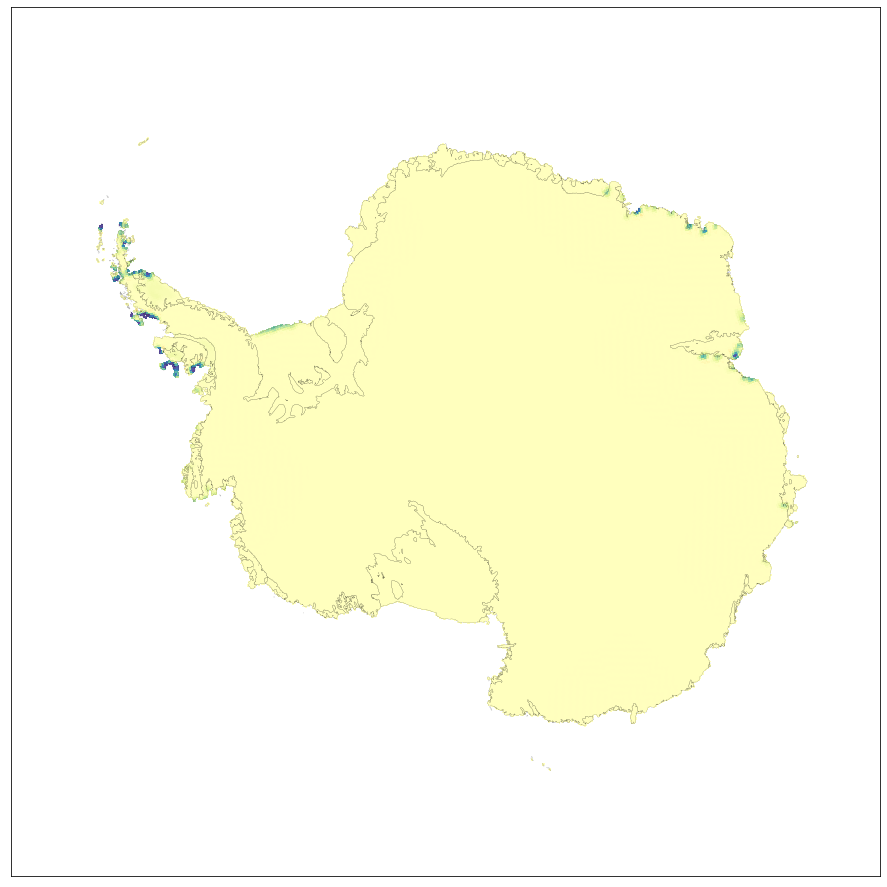

In [18]:
cube = iris.load(f'{folder_paths[0]}ERA5_31_NA_snowmelt_{year}.nc')[0]
print(cube.data[cube.data>0].sum()*12250**2/10**12)
#cube.data[cube.data < 0] = 0
plt.figure(figsize=(16,16))
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')
cube = cube.collapsed('time',iris.analysis.SUM)
cube.data = ma.masked_where(land_only_mask==False, cube.data)
pcolormesh_basemapplot(cube,antarctica_map,-200,200,cmap='Spectral')


20.668015156458637


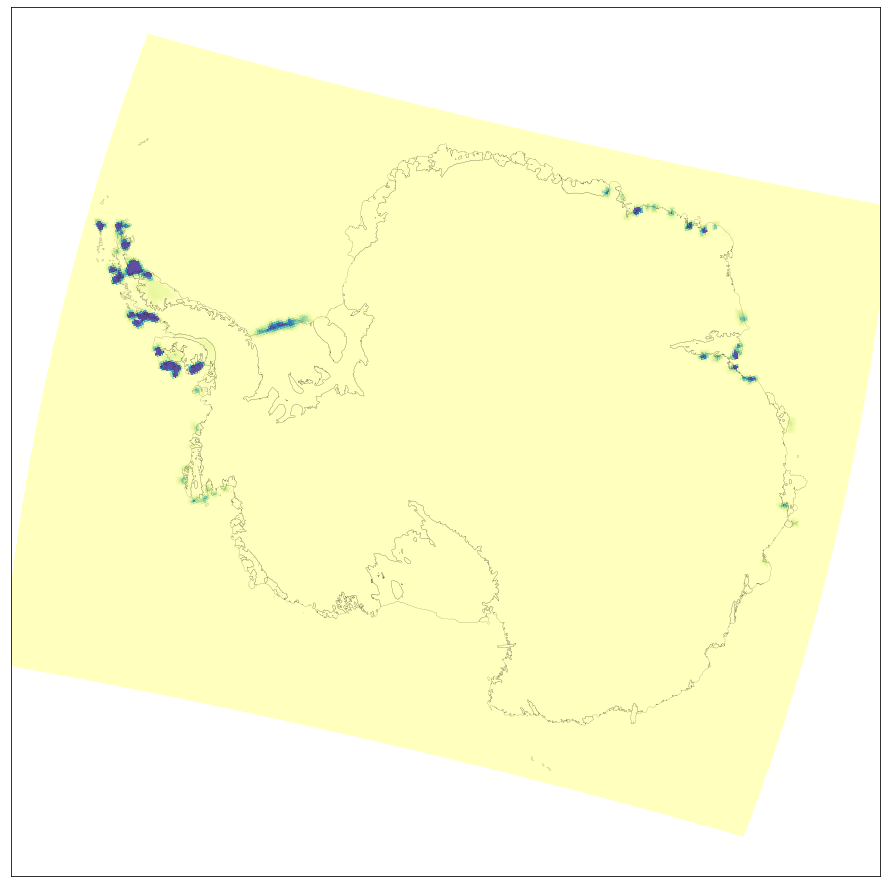

In [19]:
cube = iris.load(f'{folder_paths[1]}ERA5_31_NA_snowmelt_{year}.nc')[0]
print(cube.data.sum()*12250**2/10**12)
plt.figure(figsize=(16,16))
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')
pcolormesh_basemapplot(cube.collapsed('time',iris.analysis.SUM),antarctica_map,-100,100,cmap='Spectral')

20.560549807294382


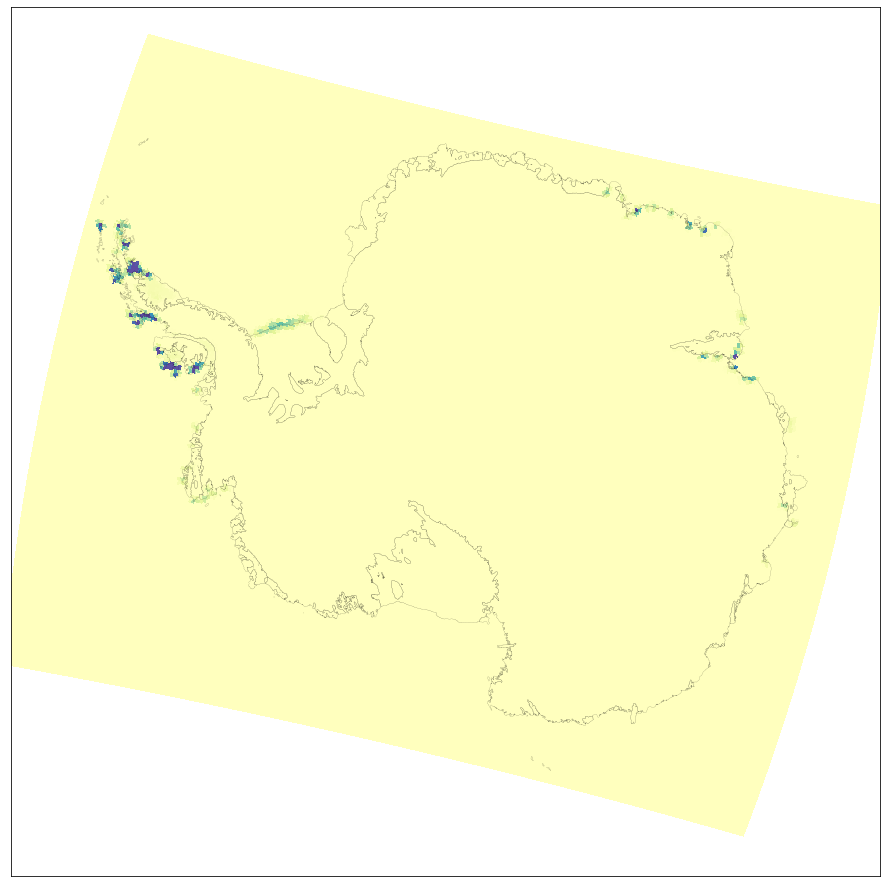

In [9]:
cube = iris.load(f'{folder_paths[2]}ERA5_31_NA_snowmelt_{year}.nc')[0]
print(cube.data.sum()*12250**2/10**12)
plt.figure(figsize=(16,16))
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')
pcolormesh_basemapplot(cube.collapsed('time',iris.analysis.SUM),antarctica_map,-200,200,cmap='Spectral')

199.04498052675285


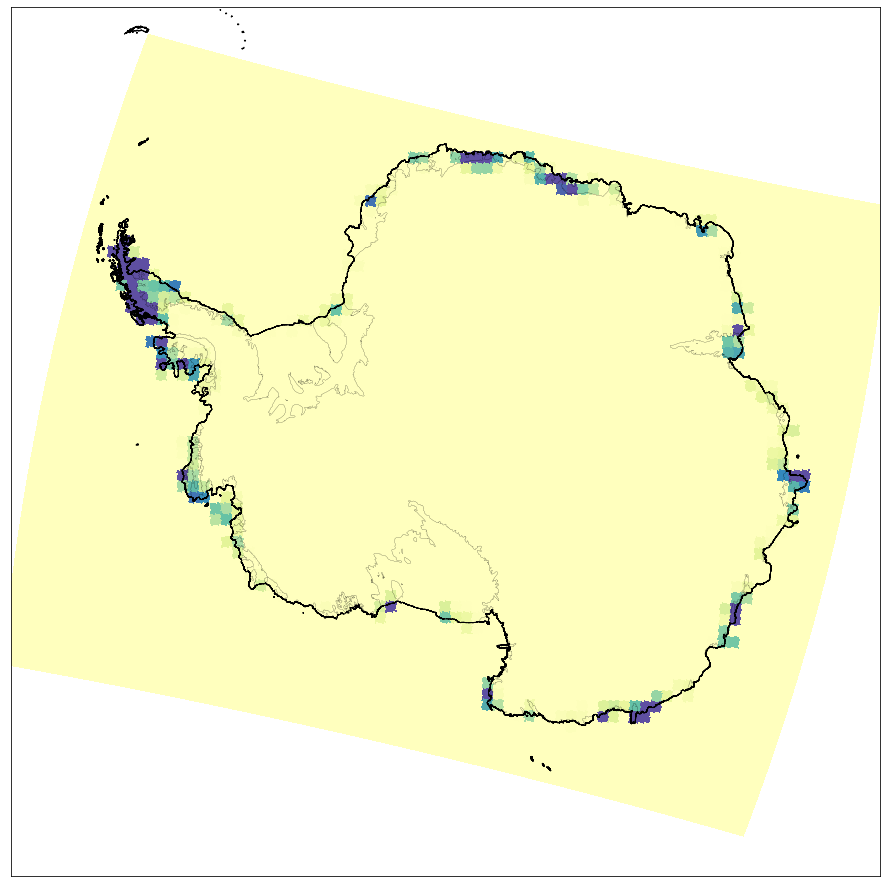

In [15]:
cube = iris.load(f'{folder_paths[2]}ERA-Interim_79_NA_snowmelt_{year}.nc')[0]
print(cube.data.sum()*12250**2/10**12)
plt.figure(figsize=(16,16))
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')
pcolormesh_basemapplot(cube.collapsed('time',iris.analysis.SUM),antarctica_map,-200,200,cmap='Spectral')
antarctica_map.drawcoastlines()


In [15]:
cube.collapsed('time',iris.analysis.SUM).data.max()

351.85490317257006

### Spatial plots of difference relative to ensemble mean for Jan year 2000.

In [32]:
cube = iris.load('/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/RACMO_27_ERA_INT_snowfall_1986.nc')[0]
cube2 = iris.load('/home/users/carter10/Shared_Storage/Antarctica_Climate_Variability/Regridded_Data/RACMO_27_ERA_INT_snowfall_2000.nc')[0]

In [27]:
remove_auxcoords(cube)

In [39]:
data_list = [cube.data,cube2.data]

In [42]:
np.concatenate(data_list,axis=0).shape

(24, 392, 504)

In [38]:
cube.coord('time')

DimCoord(array([2572.4375, 2601.9375, 2631.4375, 2661.9375, 2692.4375, 2722.9375,
       2753.4375, 2784.4375, 2814.9375, 2845.4375, 2875.9375, 2906.4375]), bounds=array([[2556.9375, 2587.9375],
       [2587.9375, 2615.9375],
       [2615.9375, 2646.9375],
       [2646.9375, 2676.9375],
       [2676.9375, 2707.9375],
       [2707.9375, 2737.9375],
       [2737.9375, 2768.9375],
       [2768.9375, 2799.9375],
       [2799.9375, 2829.9375],
       [2829.9375, 2860.9375],
       [2860.9375, 2890.9375],
       [2890.9375, 2921.9375]]), standard_name='time', units=Unit('days since 1979-01-01 00:00:00', calendar='gregorian'), long_name='time', var_name='time', attributes={'dtgstart': '1981010100'})

In [37]:
cube2.coord('time')

DimCoord(array([7685.4375, 7715.4375, 7745.4375, 7775.9375, 7806.4375, 7836.9375,
       7867.4375, 7898.4375, 7928.9375, 7959.4375, 7989.9375, 8020.4375]), bounds=array([[7669.9375, 7700.9375],
       [7700.9375, 7729.9375],
       [7729.9375, 7760.9375],
       [7760.9375, 7790.9375],
       [7790.9375, 7821.9375],
       [7821.9375, 7851.9375],
       [7851.9375, 7882.9375],
       [7882.9375, 7913.9375],
       [7913.9375, 7943.9375],
       [7943.9375, 7974.9375],
       [7974.9375, 8004.9375],
       [8004.9375, 8035.9375]]), standard_name='time', units=Unit('days since 1979-01-01 00:00:00', calendar='gregorian'), long_name='time', var_name='time', attributes={'dtgstart': '1991010100'})

In [35]:
from src.helper_functions import remove_auxcoords

In [3]:
temp_filename_list_no_year = ['ERA-Interim_79_NA_2mtemp',
           'ERA5_31_NA_2mtemp', 
           'MetUM_044_ERA_INT_tas',
           'MetUM_011_ERA_INT_tas',
           'MAR_35_ERA_INT_TT',
           'MAR_35_ERA5_TT',
           'RACMO_27_ERA_INT_t2m',
           'RACMO_27_ERA5_t2m']

snf_filename_list_no_year = ['ERA-Interim_79_NA_snowfall',
           'ERA5_31_NA_snowfall',
           'MetUM_044_ERA_INT_mean_prsn',
           'MetUM_011_ERA_INT_mean_prsn',
           'MAR_35_ERA_INT_SNF',
           'MAR_35_ERA5_SNF',
           'RACMO_27_ERA_INT_snowfall',
           'RACMO_27_ERA5_snowfall']

melt_filename_list_no_year = ['ERA-Interim_79_NA_snowmelt',
           'ERA5_31_NA_snowmelt', 
           'MetUM_044_ERA_INT_mean_snm',
           'MetUM_011_ERA_INT_mean_snm',
           'MAR_35_ERA_INT_ME',
           'MAR_35_ERA5_ME',
           'RACMO_27_ERA_INT_snowmelt',
           'RACMO_27_ERA5_snowmelt']

In [4]:
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')

In [ ]:
antarctica_map = Basemap(width=6600000,height=6600000,projection='laea',lat_ts=-55,lat_0=-90,lon_0=0,resolution='f')
pcolormesh_basemapplot(cube,antarctica_map,-5,5,cmap='Spectral_r')

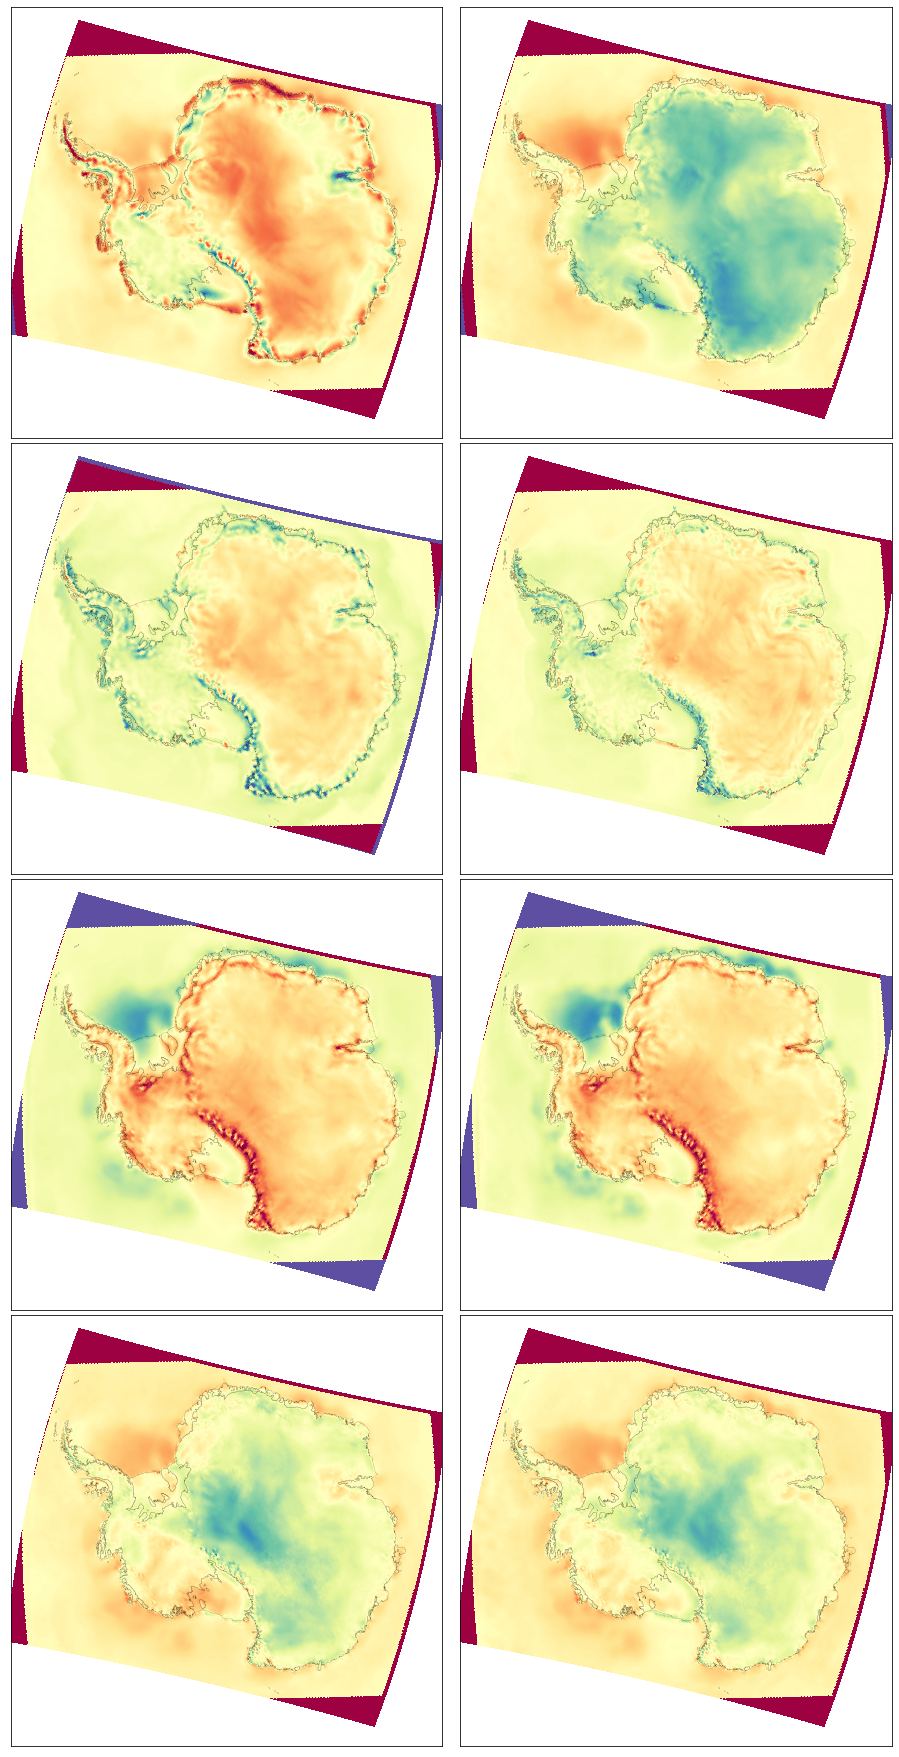

In [6]:
# Near-Surface Air Temperature

fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(16,32))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

ensemble = []
for index in np.arange(0,8,1):
    filename = temp_filename_list_no_year[index]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    ensemble.append(cube.data.data)
ensemble_average = np.array(ensemble).mean(axis=0)

for plt_number in np.arange(0,8,1):
    filename = temp_filename_list_no_year[plt_number]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    cube.data = cube.data.data - ensemble_average
    plt.subplot(4, 2, plt_number+1)
    pcolormesh_basemapplot(cube,antarctica_map,-5,5,cmap='Spectral_r')
    

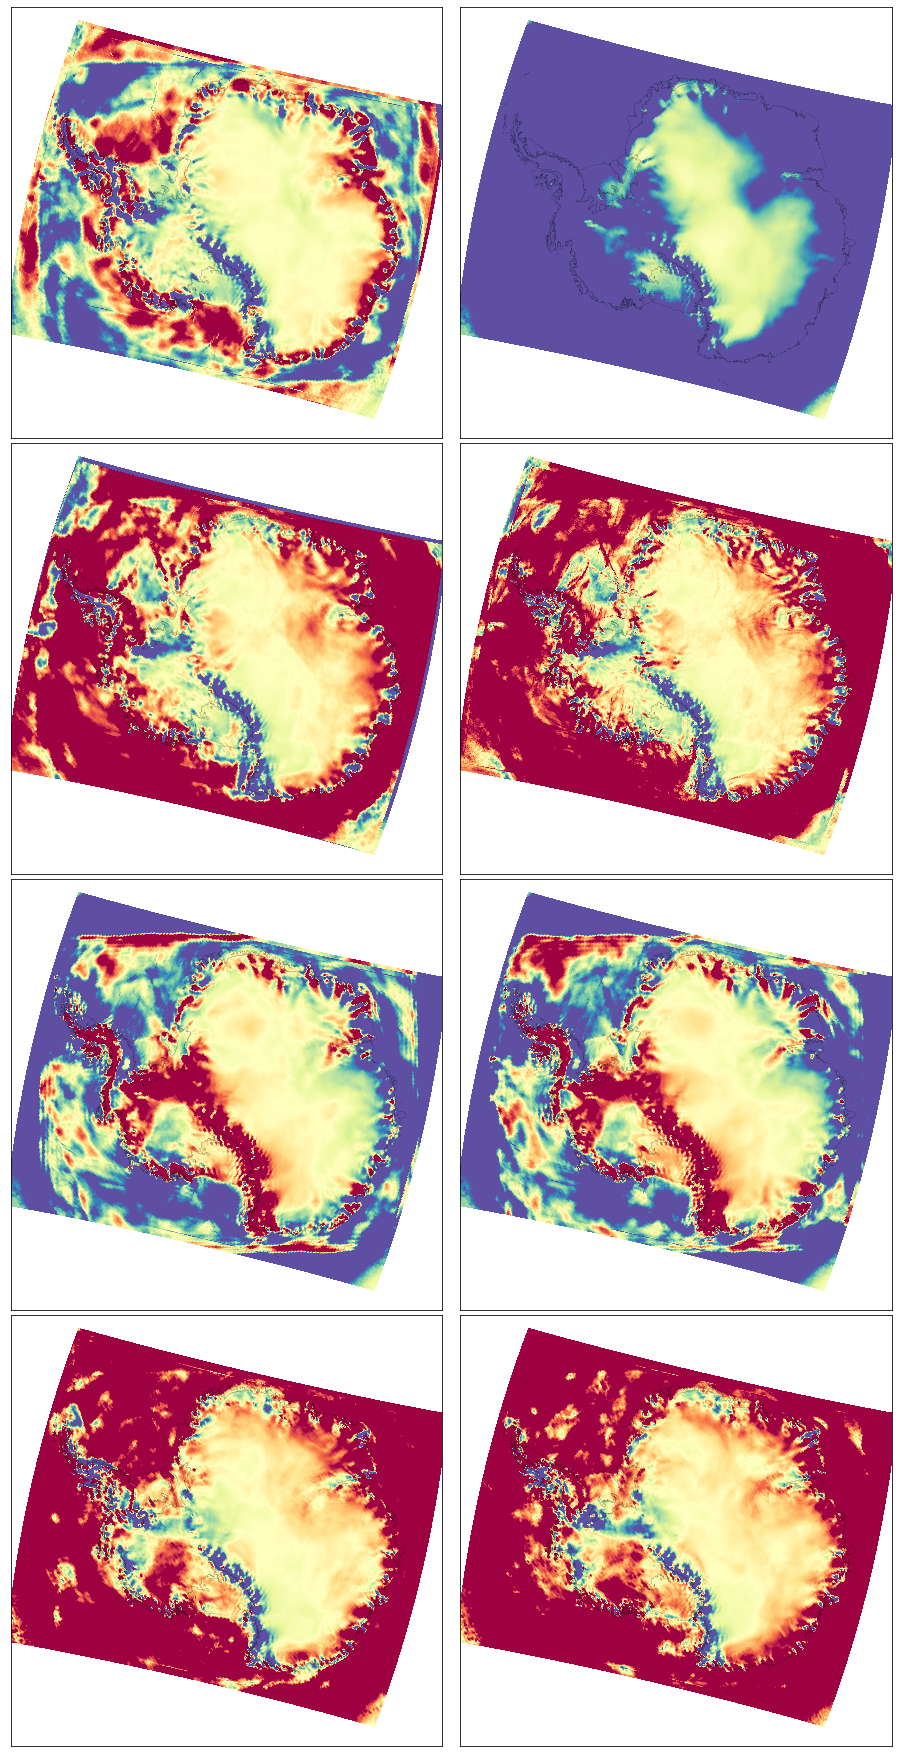

In [25]:
# Snowfall

fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(16,32))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

ensemble = []
for index in np.arange(0,8,1):
    filename = snf_filename_list_no_year[index]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    ensemble.append(cube.data.data)
ensemble_average = np.array(ensemble).mean(axis=0)

for plt_number in np.arange(0,8,1):
    filename = snf_filename_list_no_year[plt_number]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    cube.data = cube.data.data - ensemble_average
    plt.subplot(4, 2, plt_number+1)
    pcolormesh_basemapplot(cube,antarctica_map,-5,5,cmap='Spectral_r')

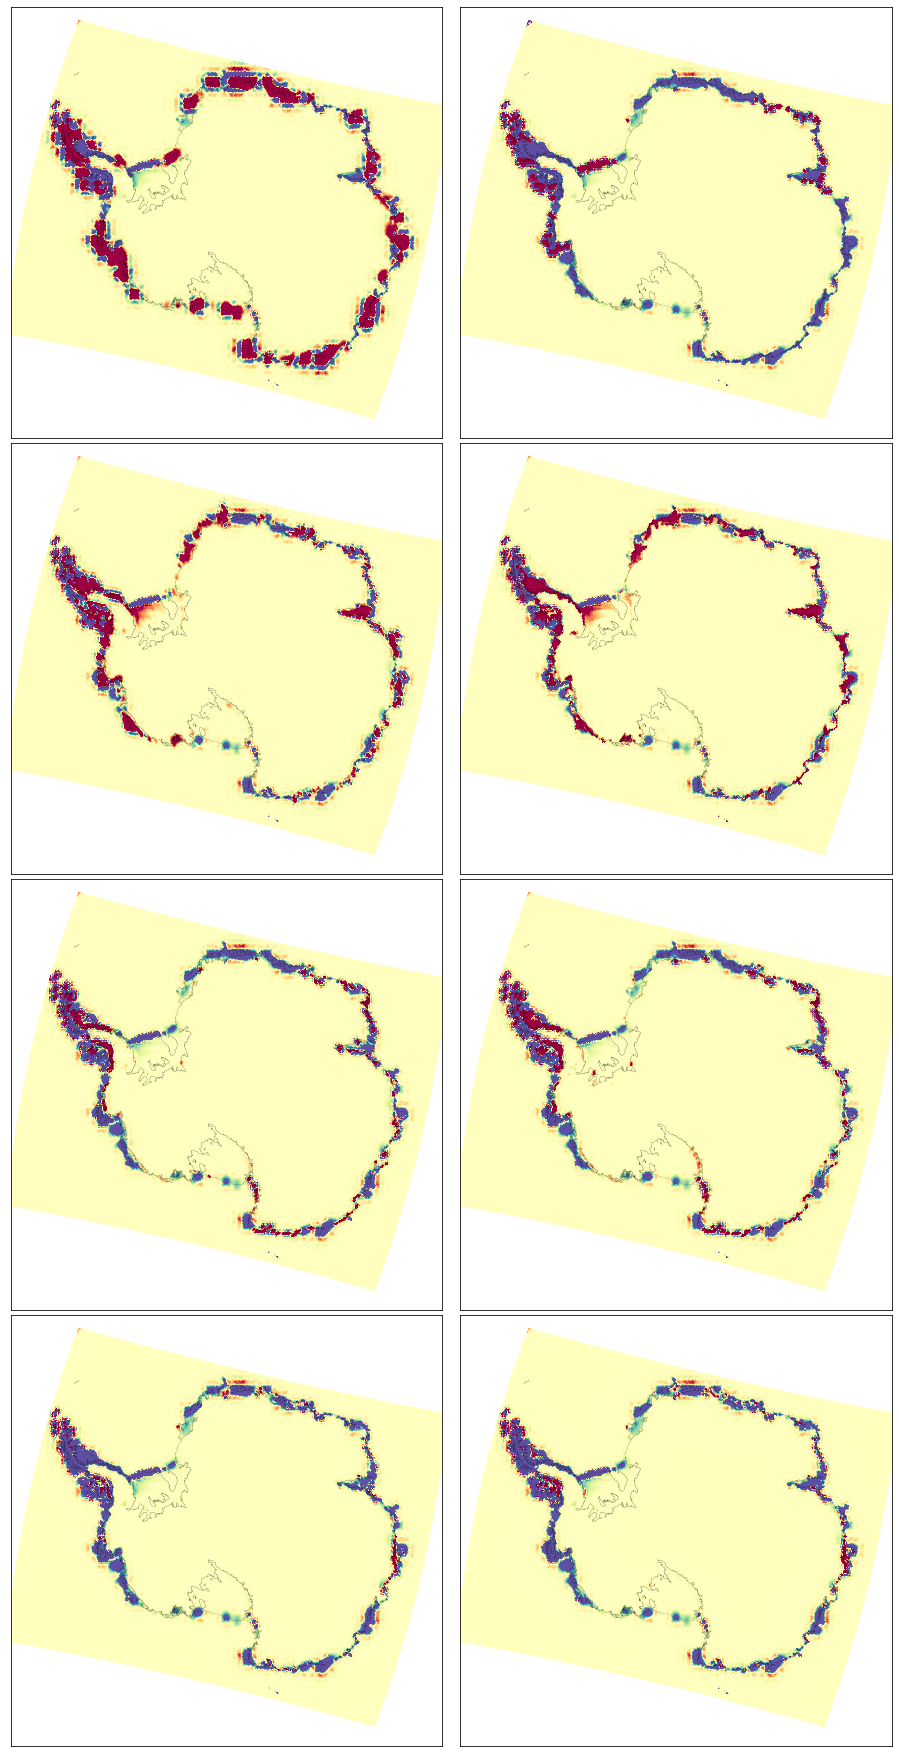

In [26]:
# Melt

fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(16,32))
fig.subplots_adjust(hspace=0.01, wspace=0.015)

ensemble = []
for index in np.arange(0,8,1):
    filename = melt_filename_list_no_year[index]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    ensemble.append(cube.data.data)
ensemble_average = np.array(ensemble).mean(axis=0)

for plt_number in np.arange(0,8,1):
    filename = melt_filename_list_no_year[plt_number]
    cube = iris.load(folder_path+filename+'_2000.nc')[0][0]
    cube.data = cube.data.data - ensemble_average
    plt.subplot(4, 2, plt_number+1)
    pcolormesh_basemapplot(cube,antarctica_map,-5,5,cmap='Spectral_r')